In [2]:
# Проект 2. Разведывательный анализ данных
# Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике,
# чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('stud_math.csv') 
#data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w+1))  -убрать???
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [2]:
autopep8.add_toolbar_button

NameError: name 'autopep8' is not defined

In [15]:
# Смотрим сколько у нас признаков и с какого типа данными  мы имеем дело.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
pstatus                350 non-null object
medu                   392 non-null float64
fedu                   371 non-null float64
mjob                   376 non-null object
fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [24]:
df.isnull().sum()
# Проверяем наличие пропусков. Пропуски есть, но их не критично много.

school                  0
sex                     0
age                     0
address                17
famsize                27
pstatus                45
medu                    3
fedu                   24
mjob                   19
fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [2]:
display(df['DESCR'])

KeyError: 'DESCR'

In [3]:
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [3]:
# Меняем название столбцом на удобные нам:
df.columns = [ 'school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']
df.columns # Смотрим что получилось

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

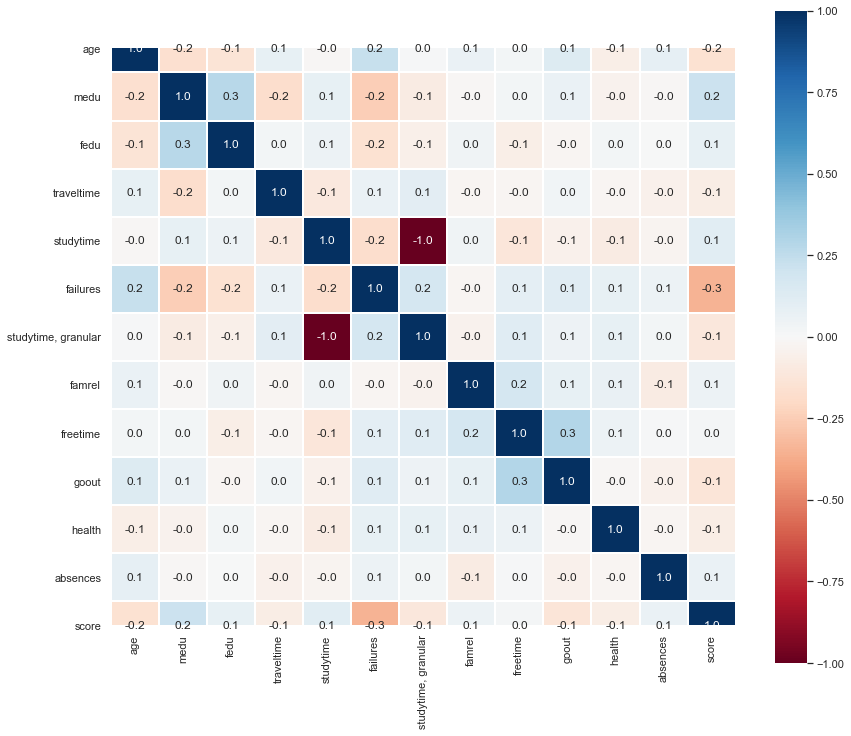

In [23]:
# Проверяем на мультиколлинеарность и кореляцию числовых признаков между собой и с главным признаком "score":
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
plt.subplots(figsize=(14, 12))
sns.heatmap(df.corr(), square=True, annot=True, fmt=".1f", linewidths=1, cmap="RdBu")

In [ ]:
# Коррелирующие с  "score" числовые показатели: 
 'age', 'medu', 'fedu','reason', 'guardian', 'traveltime', 'studytime',
'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
'freetime', 'goout', 'health', 'absences'
# НЕкоррелирующие с  "score" числовые показатели:  
'freetime' (можно удалить)
# FEDU, MEDU умеренно коррелируют между собой. Можно попробовать удалить один из них. Удалим 'fedu' .
df.drop(['fedu'], inplace = True, axis = 1)
# Сильно коррелирующие между собой показатели (мультиколинеарность): 
'studytime'-   'studytime, granular'. # Можно убрать один из показателей. Убираем 'studytime, granular'
df.drop(['studytime, granular'], inplace = True, axis = 1)

In [52]:
# school - аббревиатура школы, в которой учится ученик. Признак  категориальный.
# Как видно, у этого признака нормальное распределение, выбросов нет. Пропусков нет.Показатель "школы" важный, оставить.
pd.DataFrame(df.school.value_counts())

,school
GP,349
MS,46


In [53]:
# age - показатель возраста ученика. Признак числовой.Важный, оставляем.
pd.DataFrame(df.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

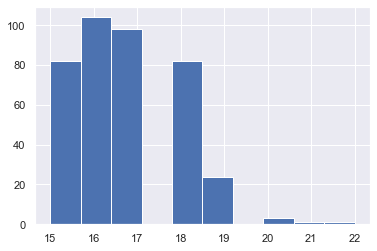

In [12]:
df.age.hist()
df.age.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.Пропусков нет.

In [17]:
pd.DataFrame(df.address.value_counts())

,address
U,295
R,83


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

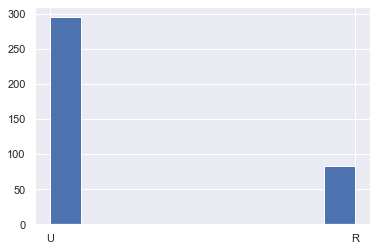

In [14]:
df.address.hist()
df.address.describe()
# address- Признак "тип адреса ученика ('U' - городской, 'R' - за городом)". Признак  категориальный.
Как видно, у этого признака нормальное распределение, выбросов нет.  Есть пропуски - заполнить нет возможности.
#Можно удалить строки с пропусками.
 df[['address']].dropna(axis=0)


In [18]:
# Признак famsize - размер семьи('LE3' <= 3, 'GT3' >3). Признак категориальный.
pd.DataFrame(df.famsize.value_counts())

,famsize
GT3,261
LE3,107


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

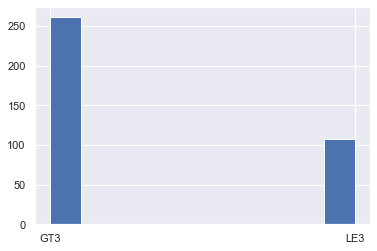

In [15]:
df.famsize.hist()
df.famsize.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.Есть пропуски (27) - заполнить нет возможности (?).
#Можно удалить cтроки с пропусками.
 df[['famsize']].dropna(axis=0)

In [25]:
# Признак pstatus - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно). Признак категориальный.
pd.DataFrame(df.pstatus.value_counts())

,pstatus
T,314
A,36


count     350
unique      2
top         T
freq      314
Name: pstatus, dtype: object

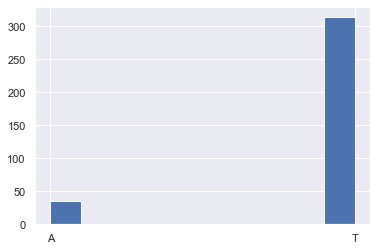

In [13]:
df.pstatus.hist()
df.pstatus.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками или заполнить чаще встречающимся значением ("Т"), но тогда возможен перекос в сторону Т.
# Лучше удалим.
 df[['pstatus']].dropna(axis=0)

In [12]:
# Признак medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Признак бинарный, но по сути категориальный.
pd.DataFrame(df.medu.value_counts())

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

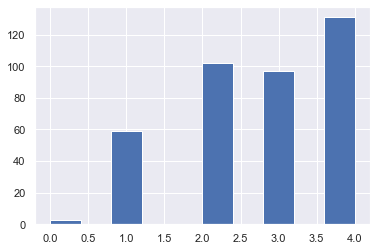

In [14]:
df.medu.hist()
df.medu.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.

In [5]:
# Есть пропуски - заполнить нет возможности.
# Можно строки с пропусками (3шт)  - заменить на часто встречающиеся.
#df['medu'].value_counts().index[0]
-> 4.0
#df[['medu']].fillna(4.0)
# или:
df[['medu']].fillna(df['medu'].value_counts().index[0])
 

4.0

In [4]:
# Признак fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Признак бинарный, но по сути категориальный.

pd.DataFrame(df.fedu.value_counts()) #-удаляем как дублирующий признак.?

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

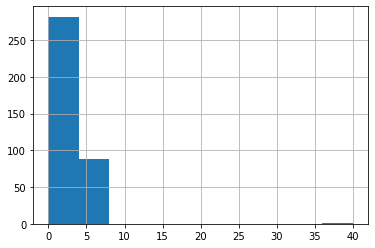

In [6]:
df.fedu.hist()
df.fedu.describe()
# Как видно, у этого признака нормальное распределение, выбросов есть, значение 40.
# Его надо заменить на реальное(например самое частое  или предположительно -4)
df['fedu'] = df['fedu'].replace(40, 4) 
# Есть пропуски - заполнить нет возможности.
# Можно строки с пропусками (24шт)  - заменить на самое частое() или удалить. Голосуем за - удалить.

In [22]:
# Признак mjob - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.mjob.value_counts())

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


count       376
unique        5
top       other
freq        133
Name: mjob, dtype: object

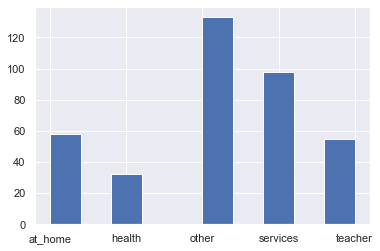

In [26]:
df.mjob.hist()
df.mjob.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (19 шт.)
 df[['mjob']].dropna(axis=0)

count       359
unique        5
top       other
freq        197
Name: fjob, dtype: object

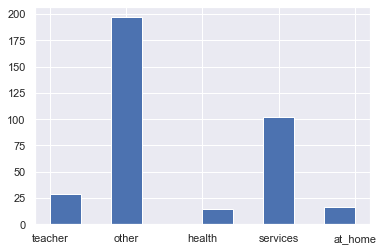

In [27]:
# Признак Fjob - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.fjob.value_counts())
df.fjob.hist()
df.fjob.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (36 шт).
 df[['fjob']].dropna(axis=0)

In [25]:
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

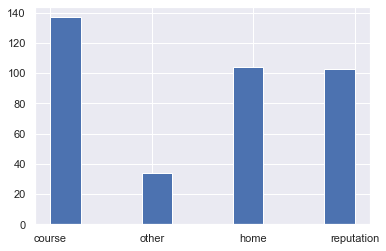

In [28]:
pd.DataFrame(df.reason.value_counts())
df.reason.hist()
df.reason.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
#Есть пропуски - заполнить нет возможности.
#Можно удалить cтроки с пропусками.
 df[['reason']].dropna(axis=0)

In [26]:
pd.DataFrame(df.guardian.value_counts())

,guardian
mother,250
father,86
other,28


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

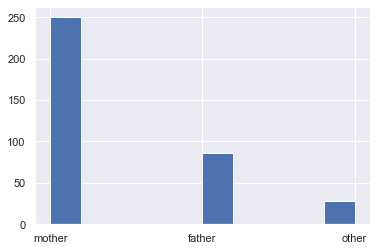

In [30]:
pd.DataFrame(df.guardian.value_counts())
df.guardian.hist()
df.guardian.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
#Есть пропуски - заполнить нет возможности.
#Можно удалить cтроки с пропусками.

In [ ]:
pd.DataFrame(df.guardian.value_counts())
df.guardian.hist()
df.guardian.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
#Есть пропуски - заполнить нет возможности.
#Можно удалить cтроки с пропусками.

In [29]:
# смотрим коррелляцию числовых признаков между собой. 
df.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [ ]:
# можно убрать сильно скореллированные: сильной корреляции между числовыми признаками НЕТ. Убирать нечего. 
#Fedu & Medu относительно коррелируют между собой. Можно удалить Fedu.

In [31]:
Выясним, какие столбцы коррелируют с оценкой по математике ("score"). 
Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:
# Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:


SyntaxError: invalid syntax (<ipython-input-31-3745e9496c2d>, line 1)

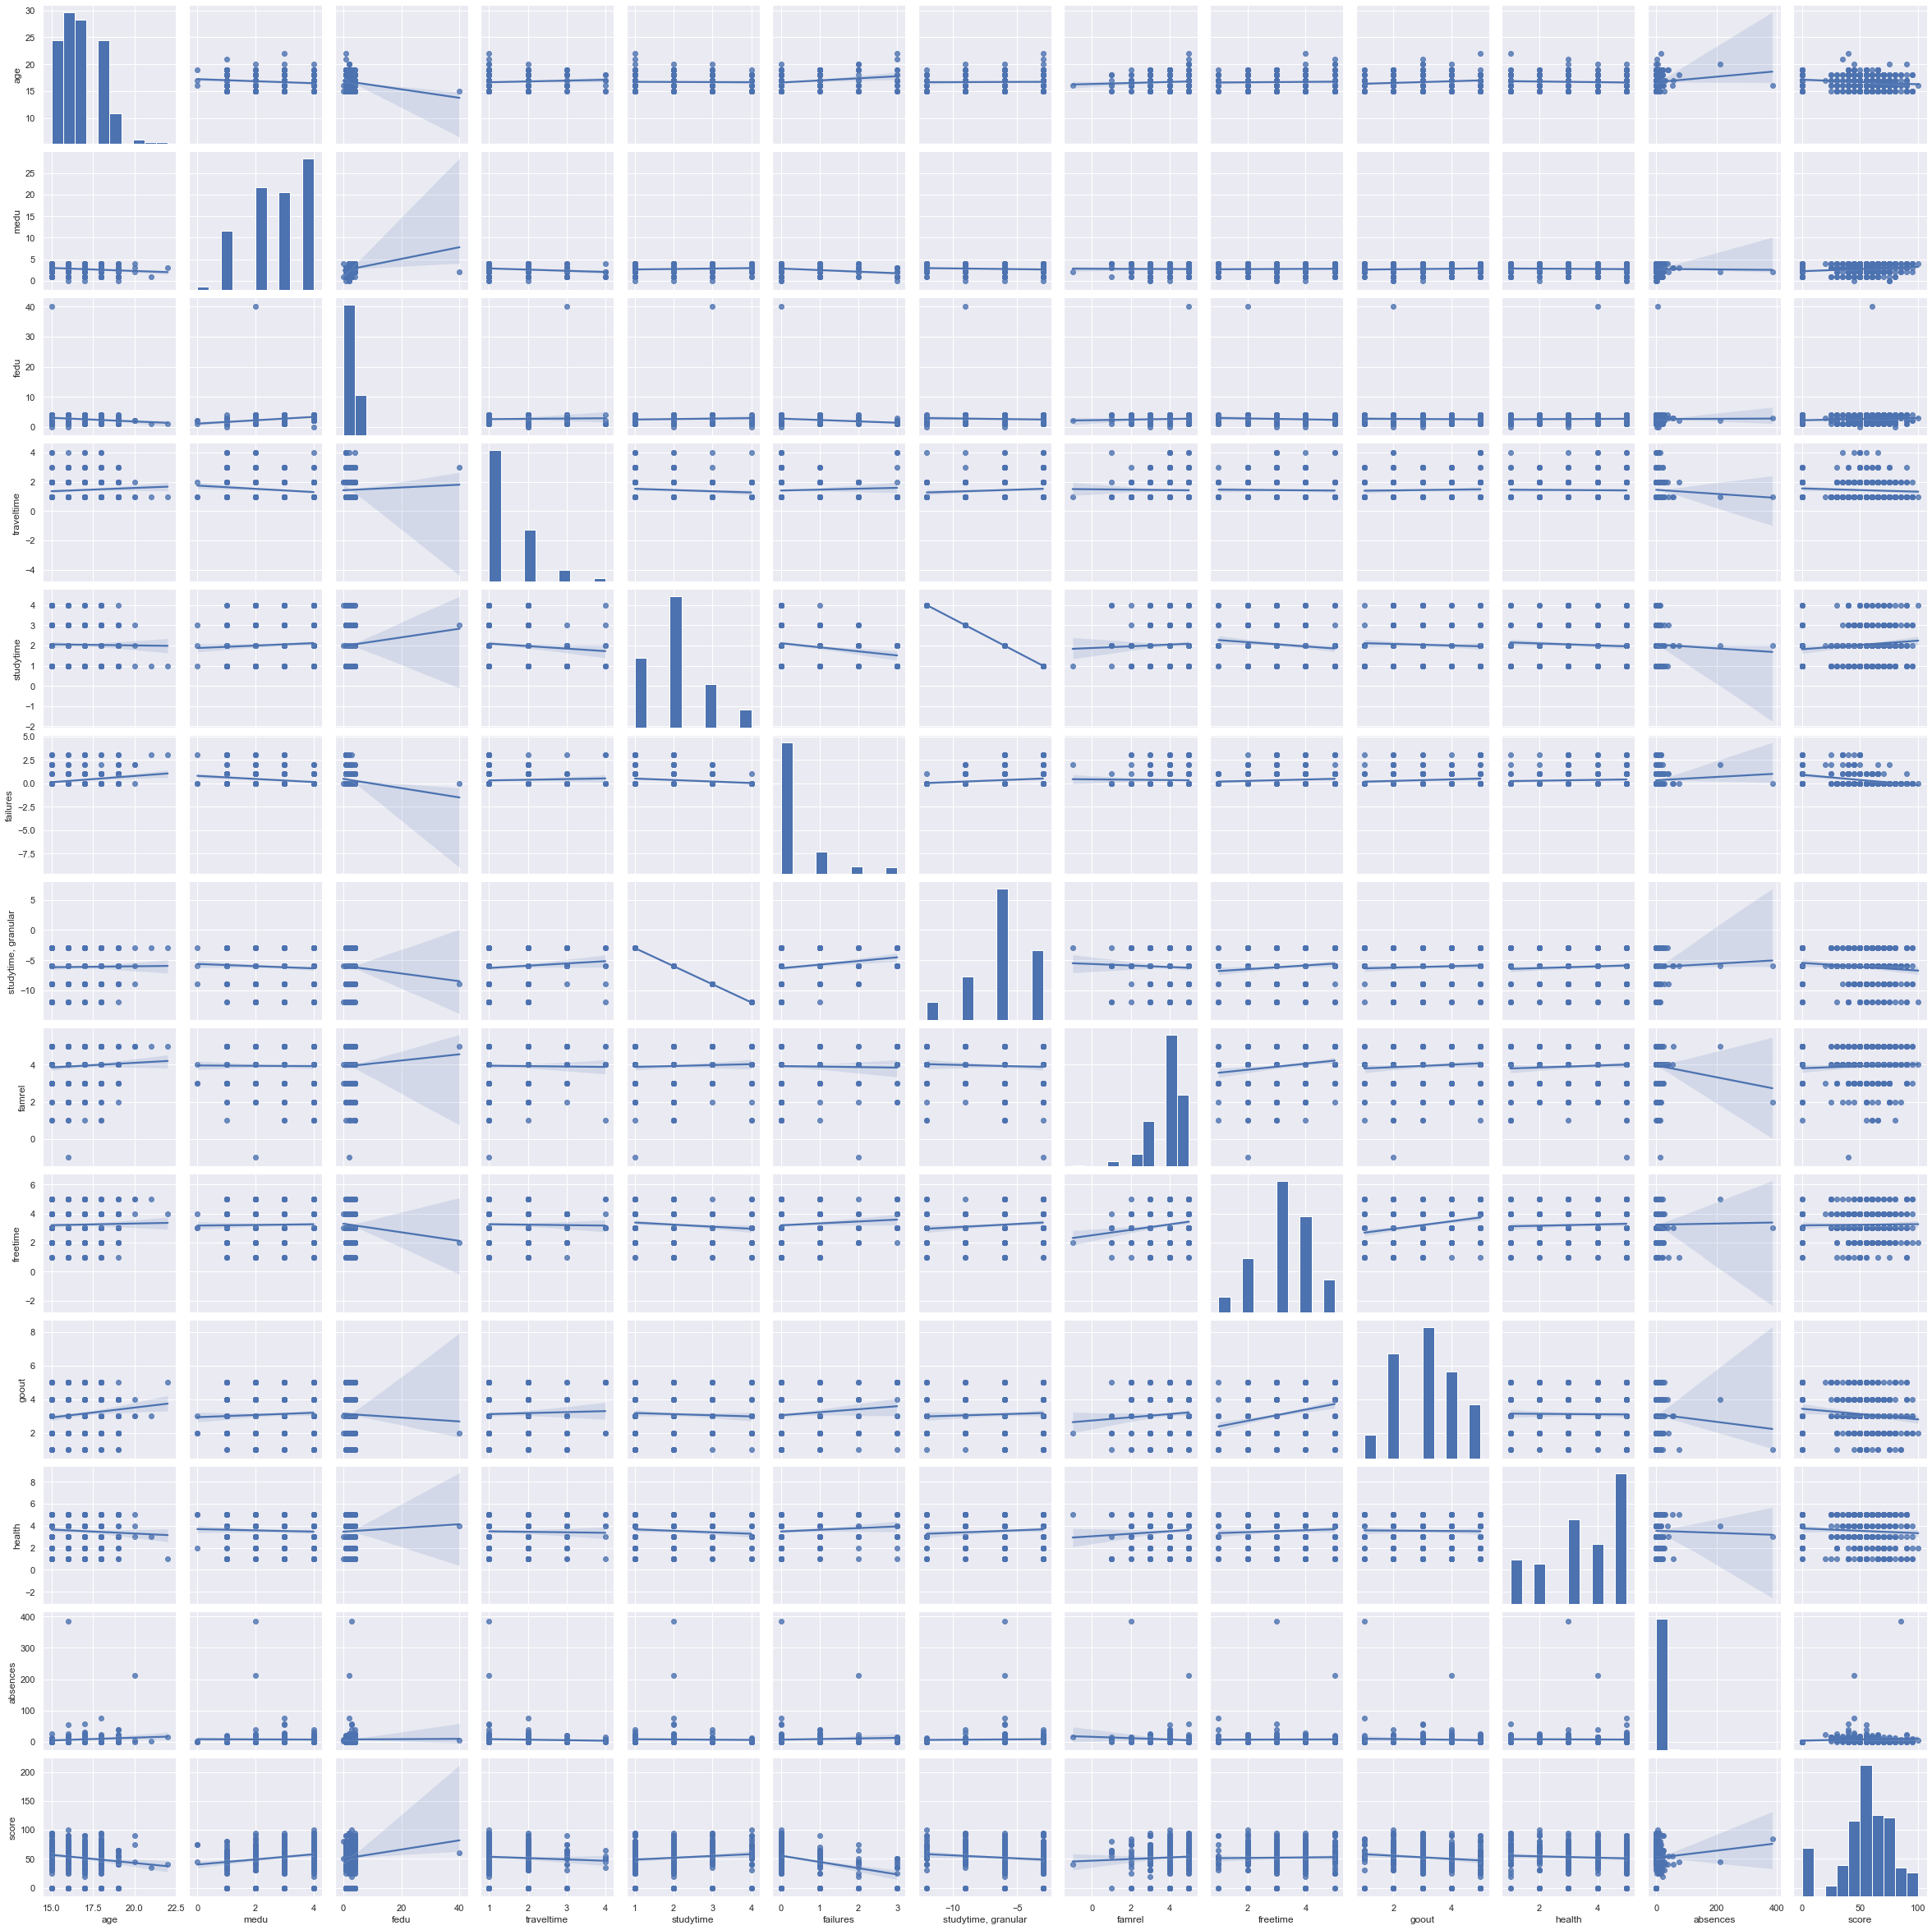

In [33]:
sns.pairplot(df, kind = 'reg')

In [ ]:
Останутся X слабоскоррелированные с оценкой по математике ("score") переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, 
что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

In [34]:
# Анализ номинативных признаков:
#Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. 
#Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, 
#с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).


In [ ]:
#Номинативные переменные, которые осталось рассмотреть: 
'sex', 'address', 'famsize', 'pstatus', 'mjob',
       'fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'

#Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [19]:
# - напишем функцию 
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (25, 10))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

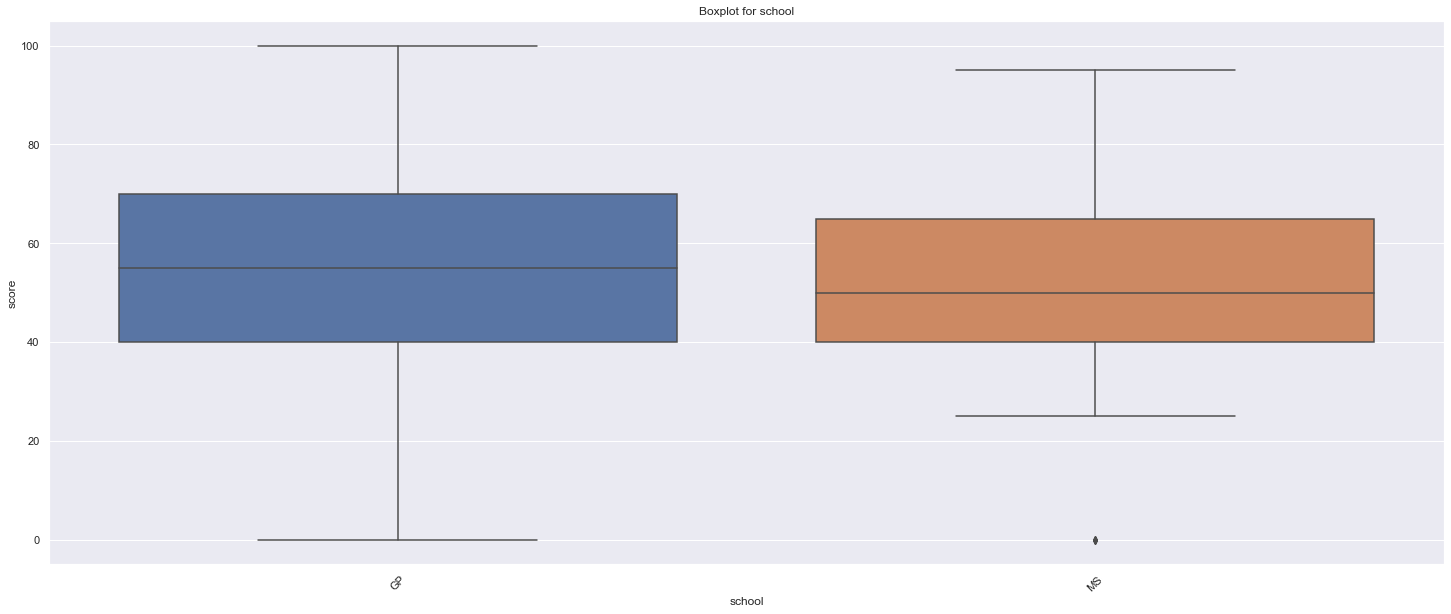

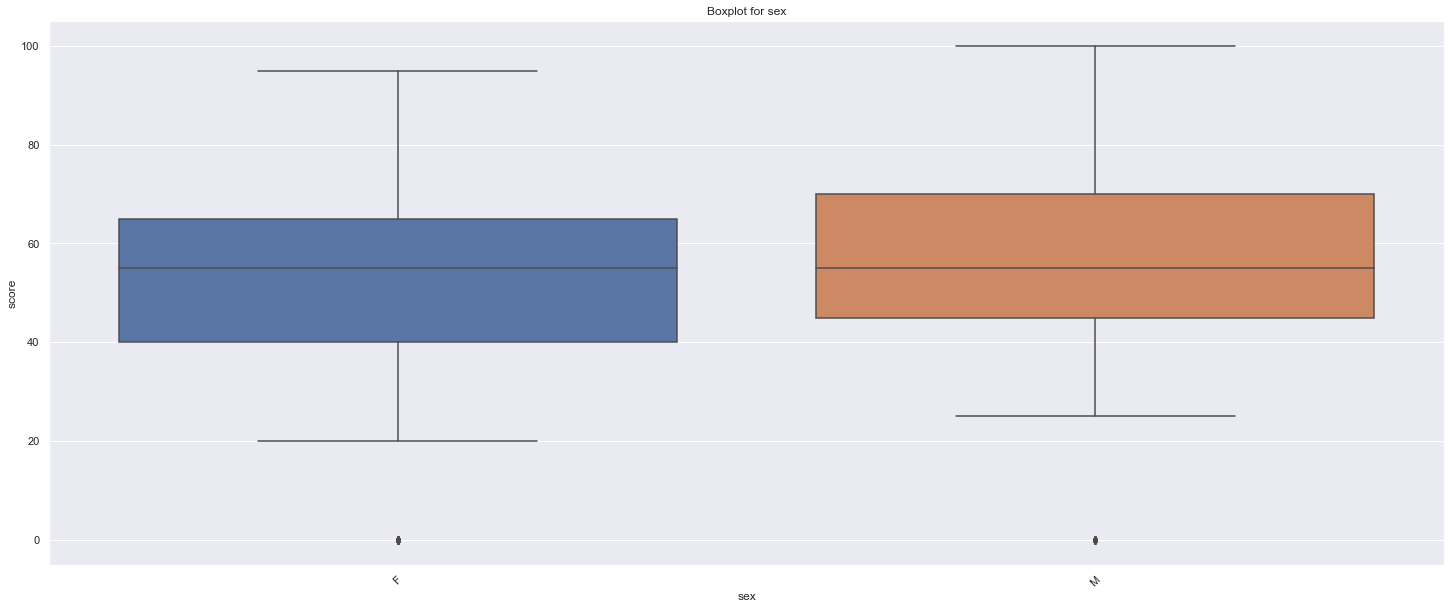

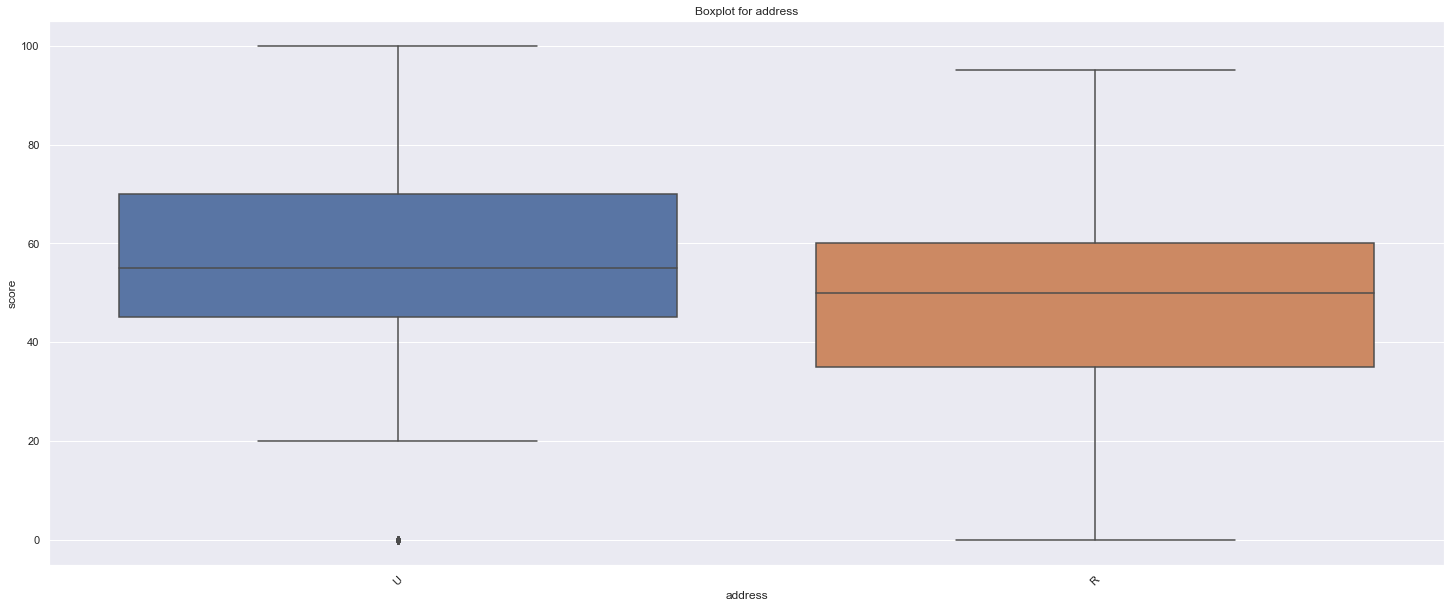

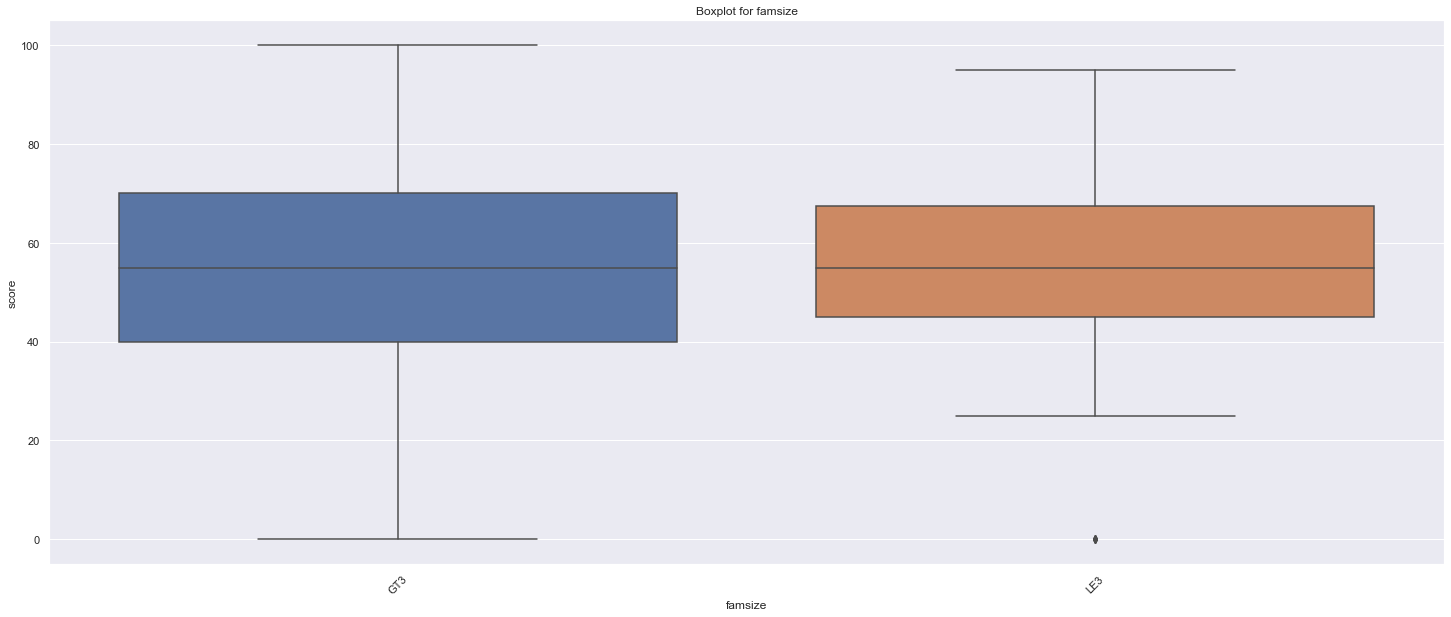

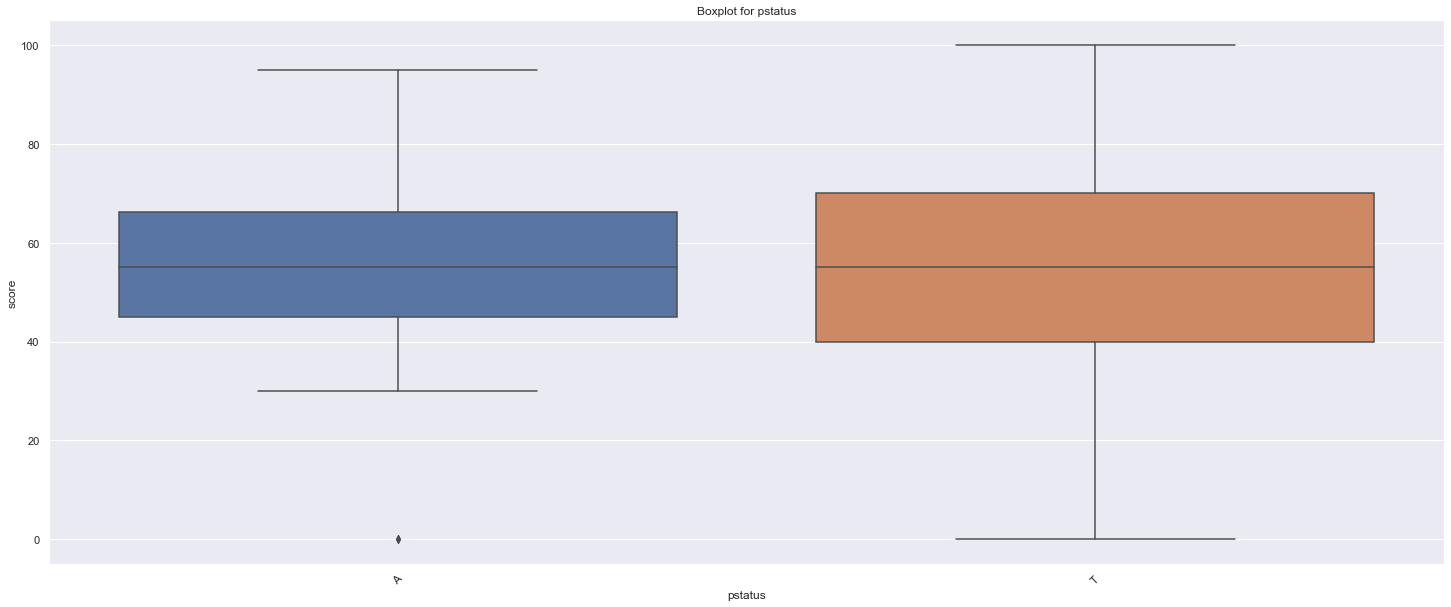

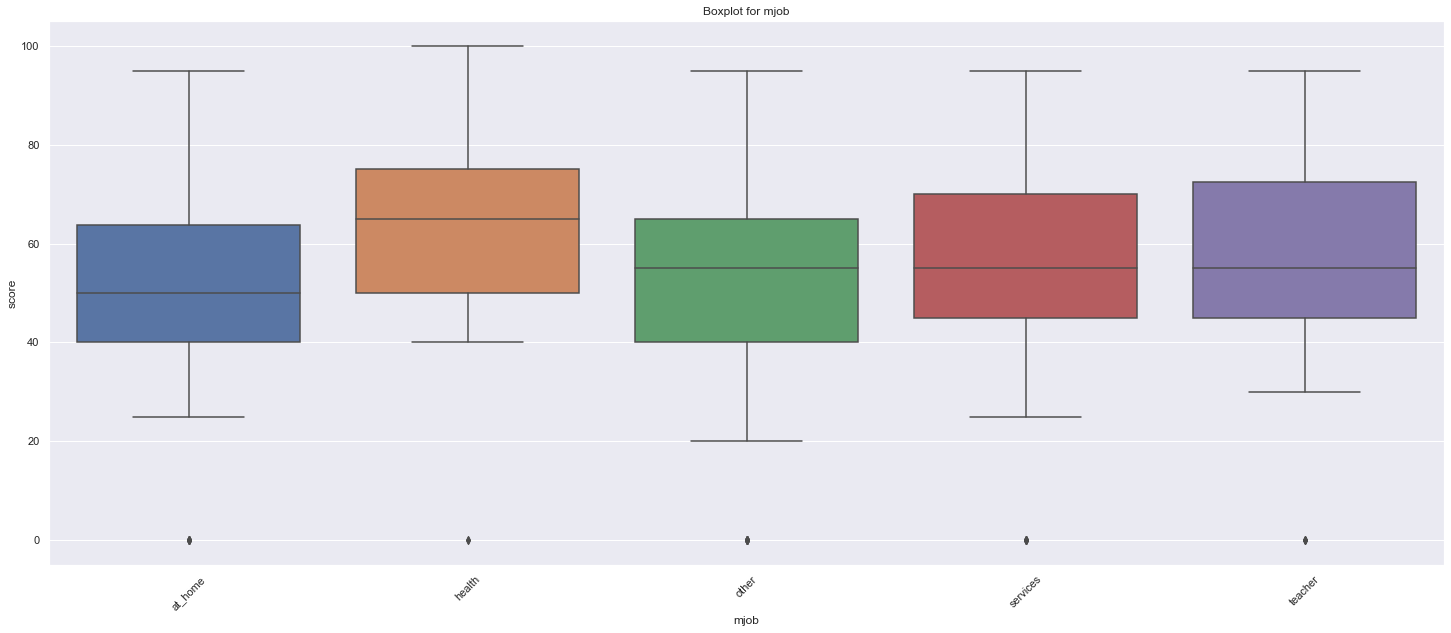

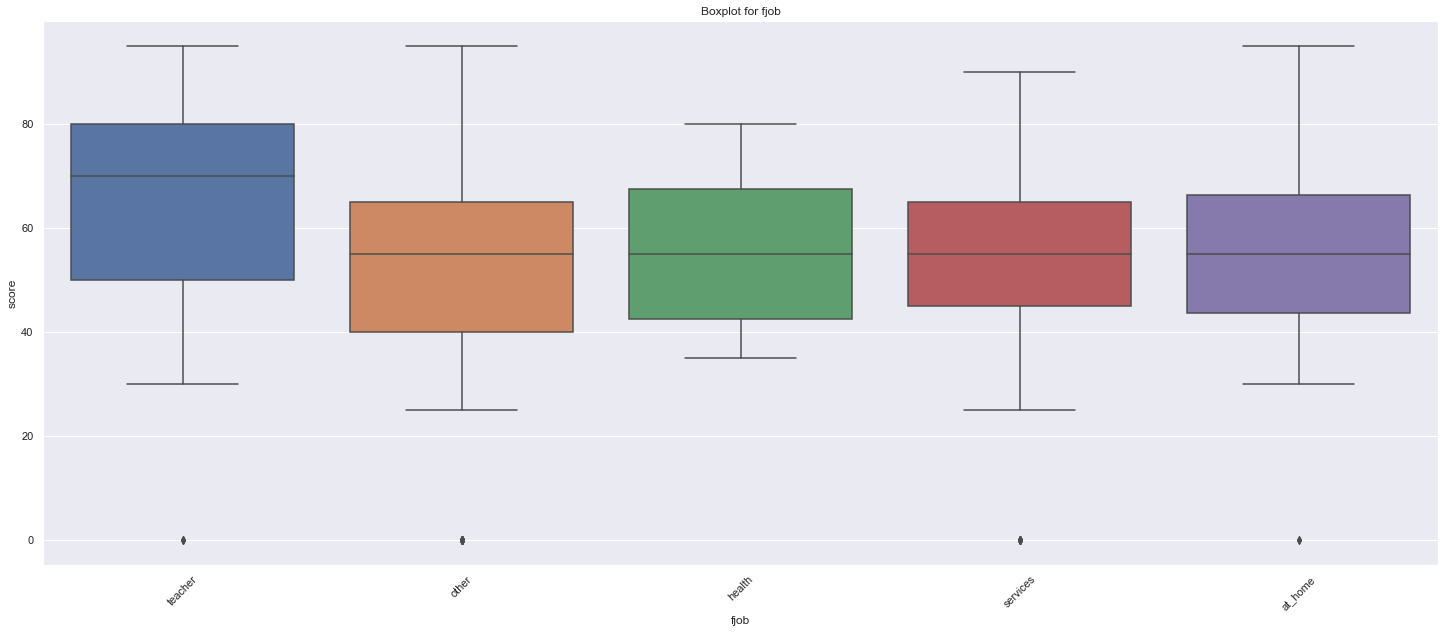

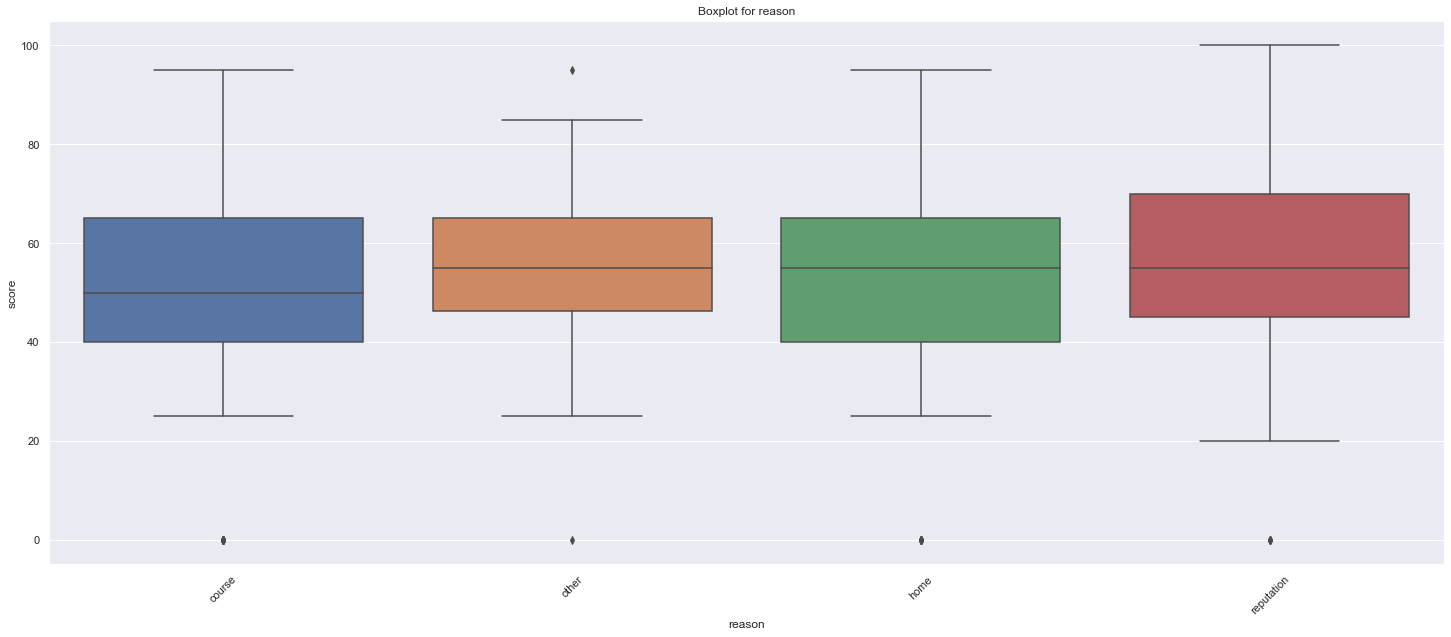

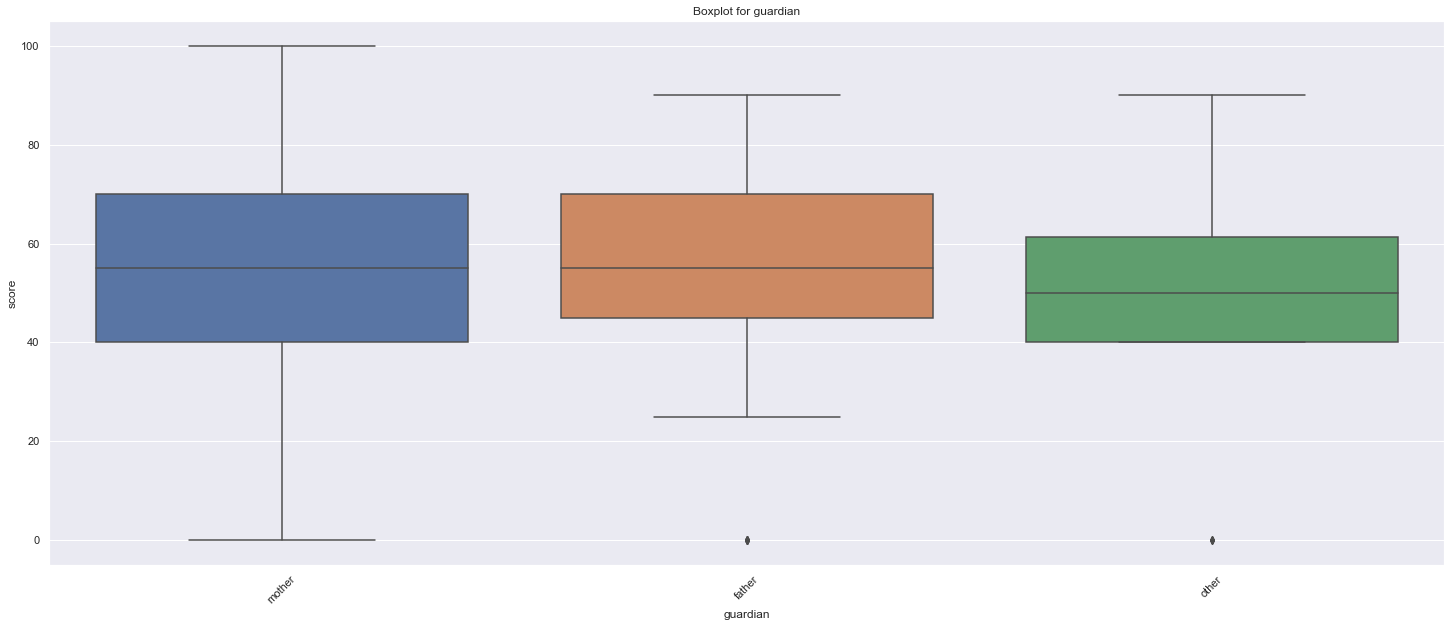

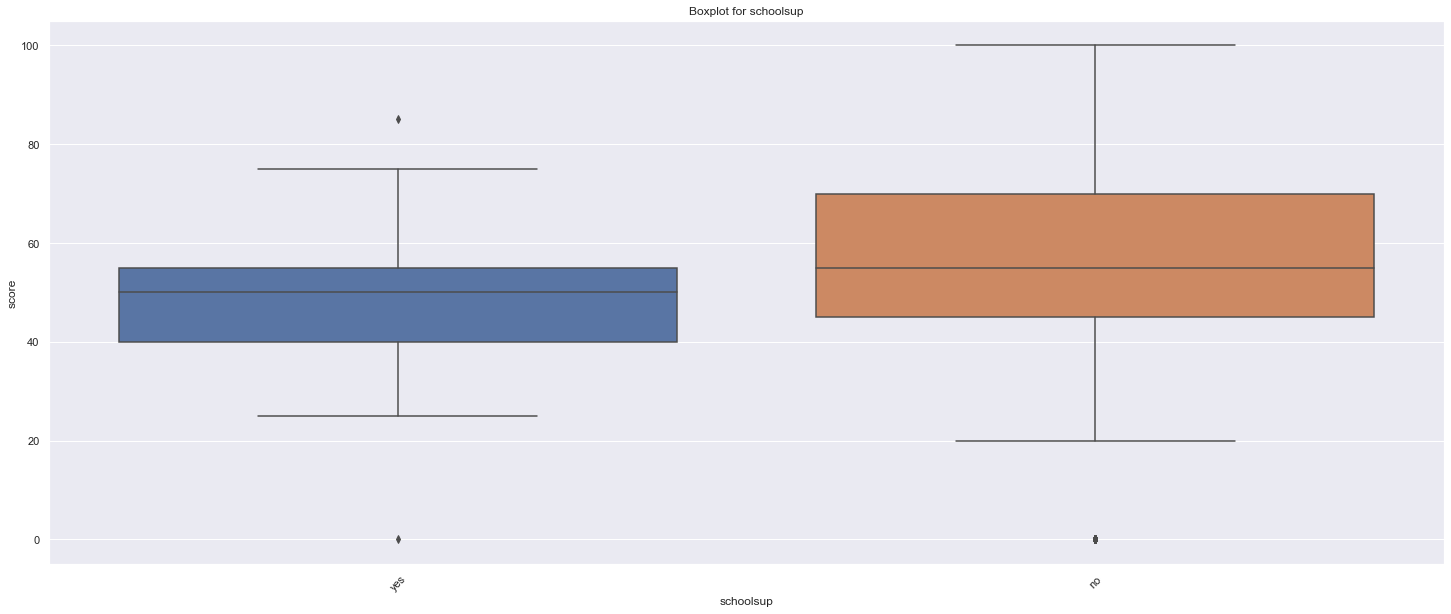

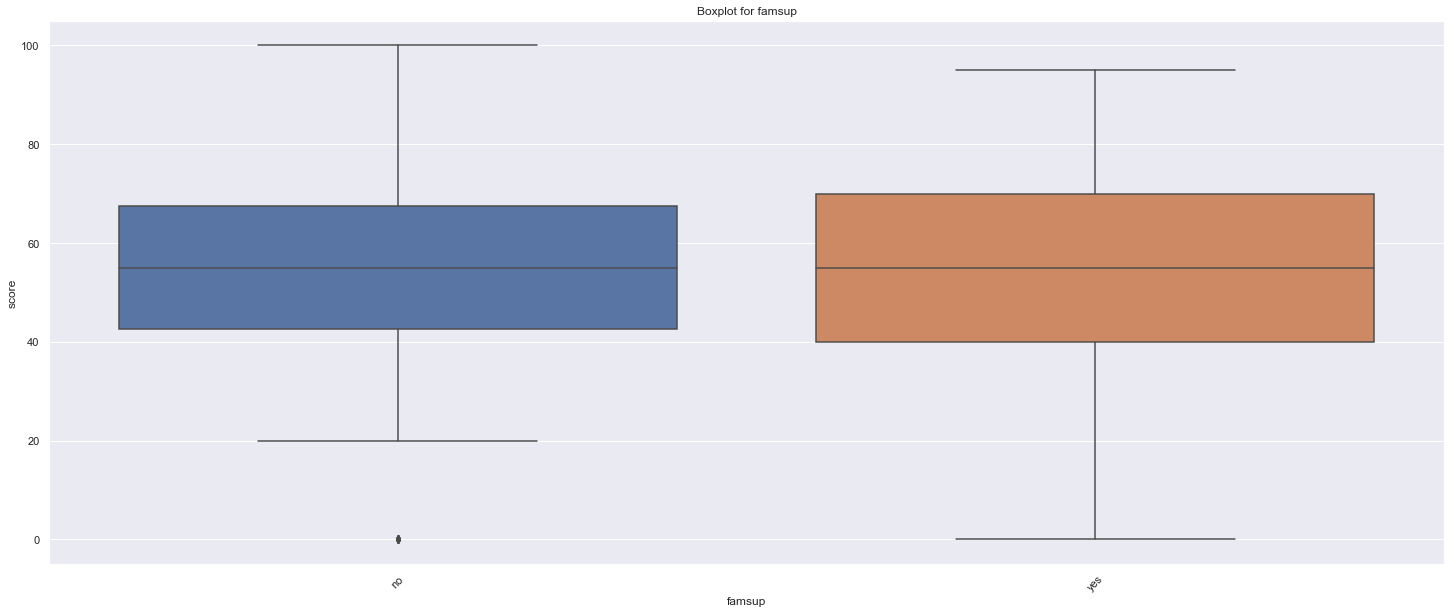

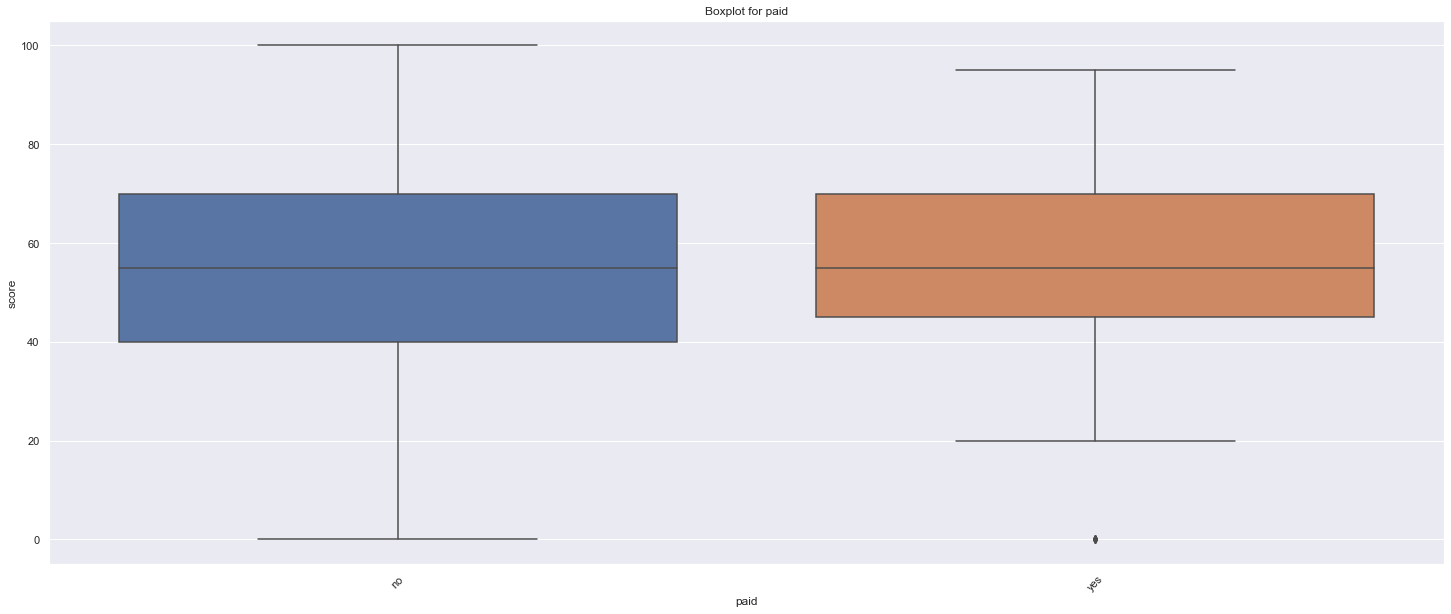

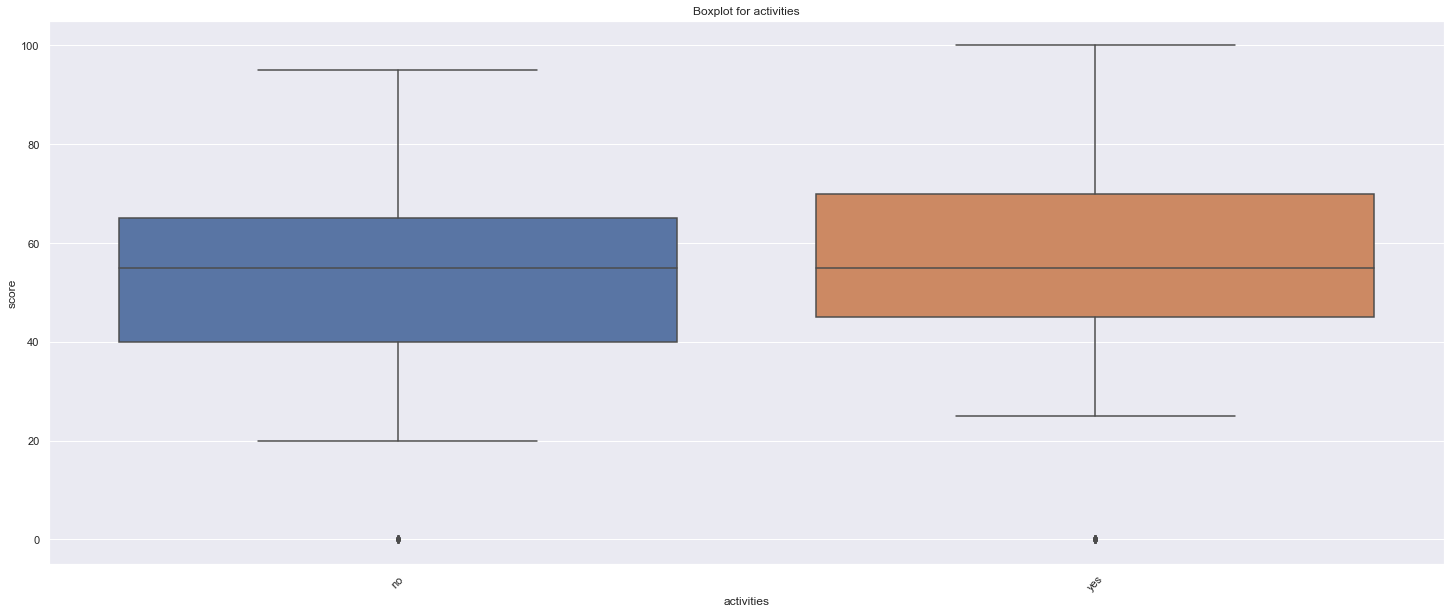

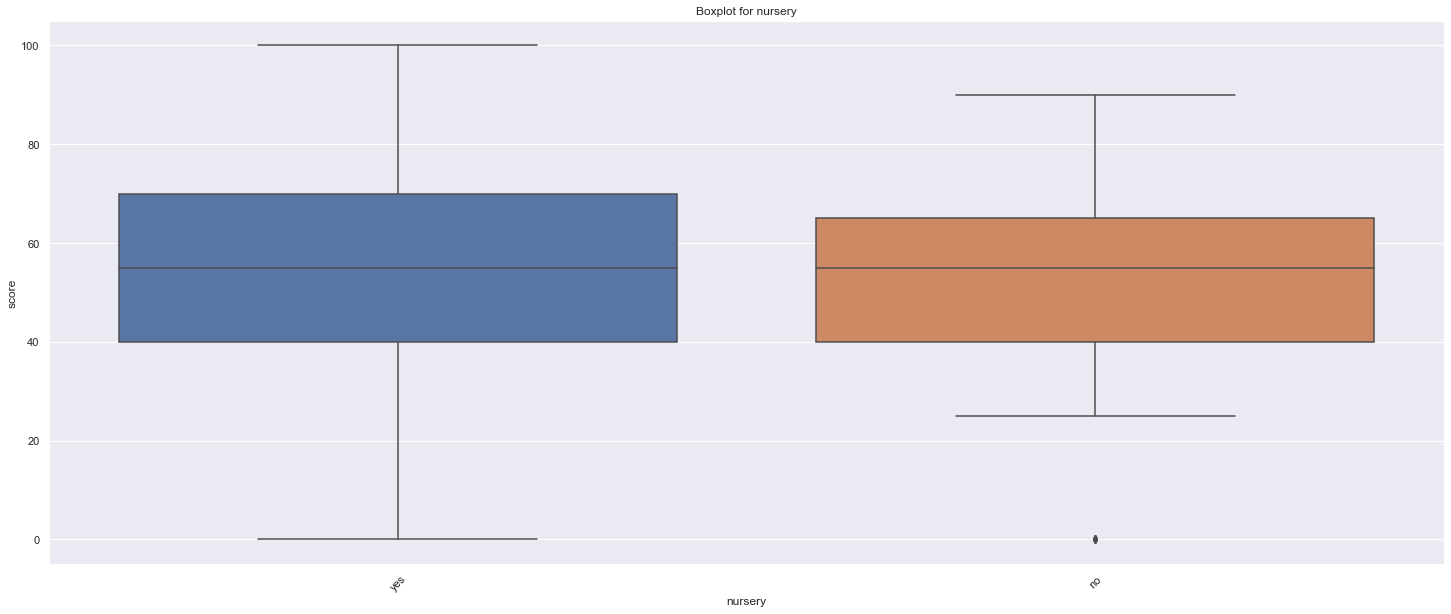

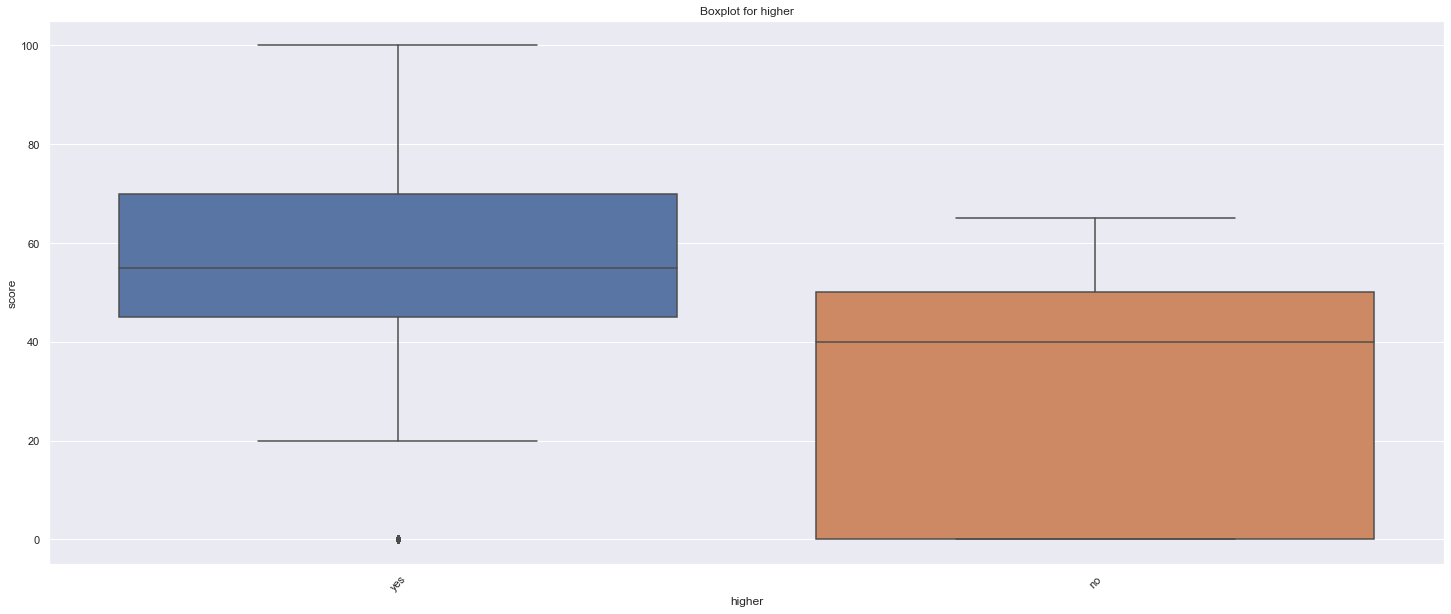

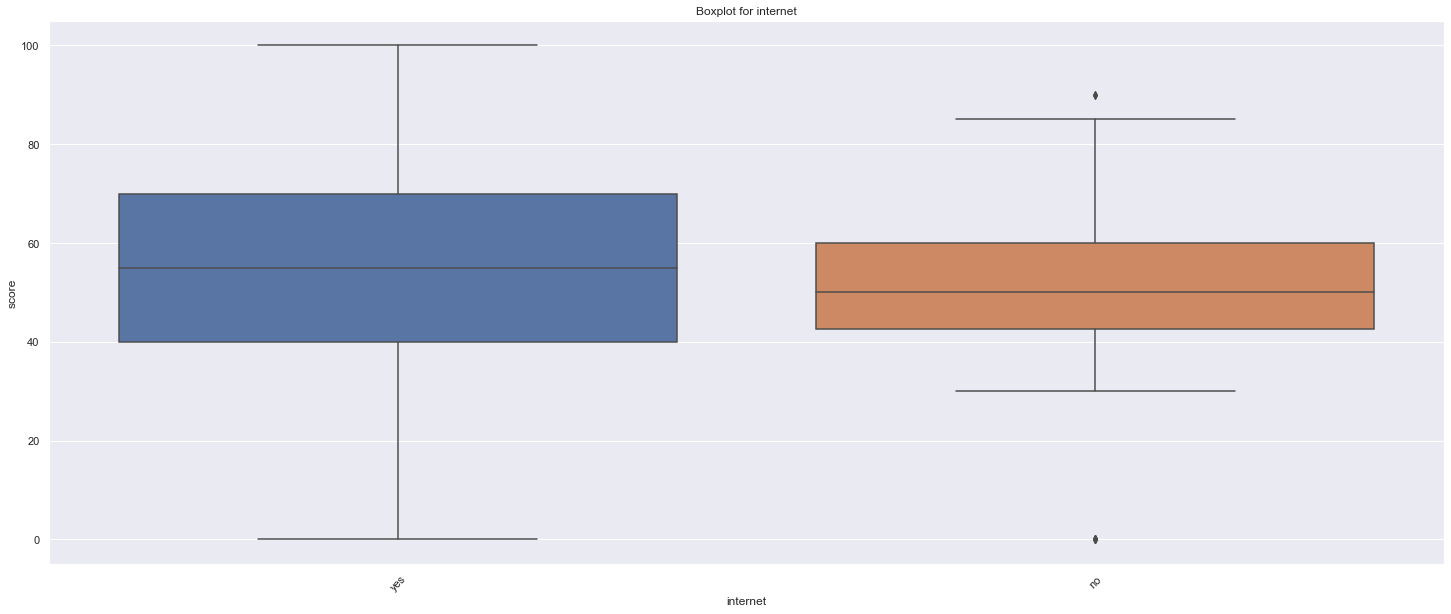

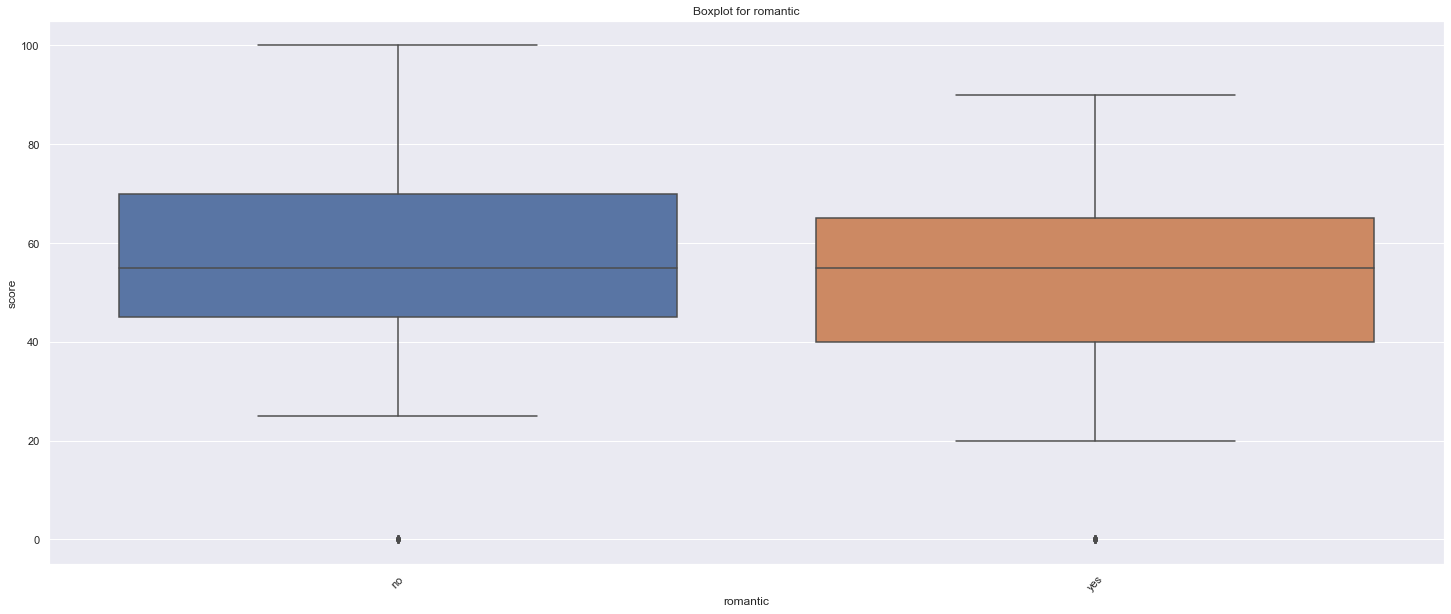

In [20]:
for column in ['school','sex', 'address', 'famsize', 'pstatus', 'mjob',
       'fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']:
    get_boxplot(column)

In [35]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [36]:
for col in ["paid"]:
    get_stat_dif(col)

NameError: name 'combinations' is not defined

In [ ]:
Как мы видим, серьёзно отличаются 5 параметра: 'mjob','fjob','schoolsup', 'higher', 'internet',
Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, 
оказывают влияние на оценку, это: 'mjob','fjob','schoolsup', 'higher', 'internet',
  

In [ ]:
Не важные переменные (можно удалить): 'sex'(?),'school'(?) не сильные различия, 'address'(?), 'famsize', 
    'Pstatus'(?),'reason', 'guardian'(?), 'famsup', 'paid', 'activities', 'nursery', 'romantic'
    
    

In [ ]:
Надо обработать сам солбик  score!!!!!